<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-1/blob/main/Semana4_Actividad4_Team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**FUNDAMENTOS DEL ANÁLISIS PCA**

##**PARTE 1 ANÁLISIS PCA**

###Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos 



We will start by importing the libraries we will need for this exercise.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


After that, we will import the dataset. It is important to mentioned that the dataset is exactly the same we analyzed and cleaned last week. 

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-team-1/main/Modulo3/Actividad3_DataSet.csv", index_col = 0)
df.index.name=None
df  #this will help us visualize the data. A preview

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


We will drop the variables that are categorical since the PCA does not work with this type of data. Based on the data set description, we know that the followings are conisdered as categorical. 

* X2 (GENDER)
* X3 (EDUCATION)
* X4 (MARITAL STATUS)
* X6-X11 (PAYMENT STATUS)

As you may remember, we consider this values categorical because we have a range of specific numerical values that should be used and specific categorical values for each numerical value. For example, in gender 1 = male; 2 = female.

In [ ]:
df_num= df.drop(columns=['X2','X3','X4','X6','X7','X8','X9','X10', 'X11', 'Y'])
df_num.head() #we will visualize if we drop the desired columns correctly

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Since it is hard to identify what we are talking about in each column we will change the names of the columns.

In [ ]:
df_num.columns = ['Credit','Age', 'bill_Sep','bill_Aug','bill_Jul','bill_Jun','bill_May','bill_Apr', 'paid_Sep','paid_Aug','paid_Jul','paid_Jun','paid_May','paid_Apr']
df_num

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


We will know look for the correlation between the variables. 

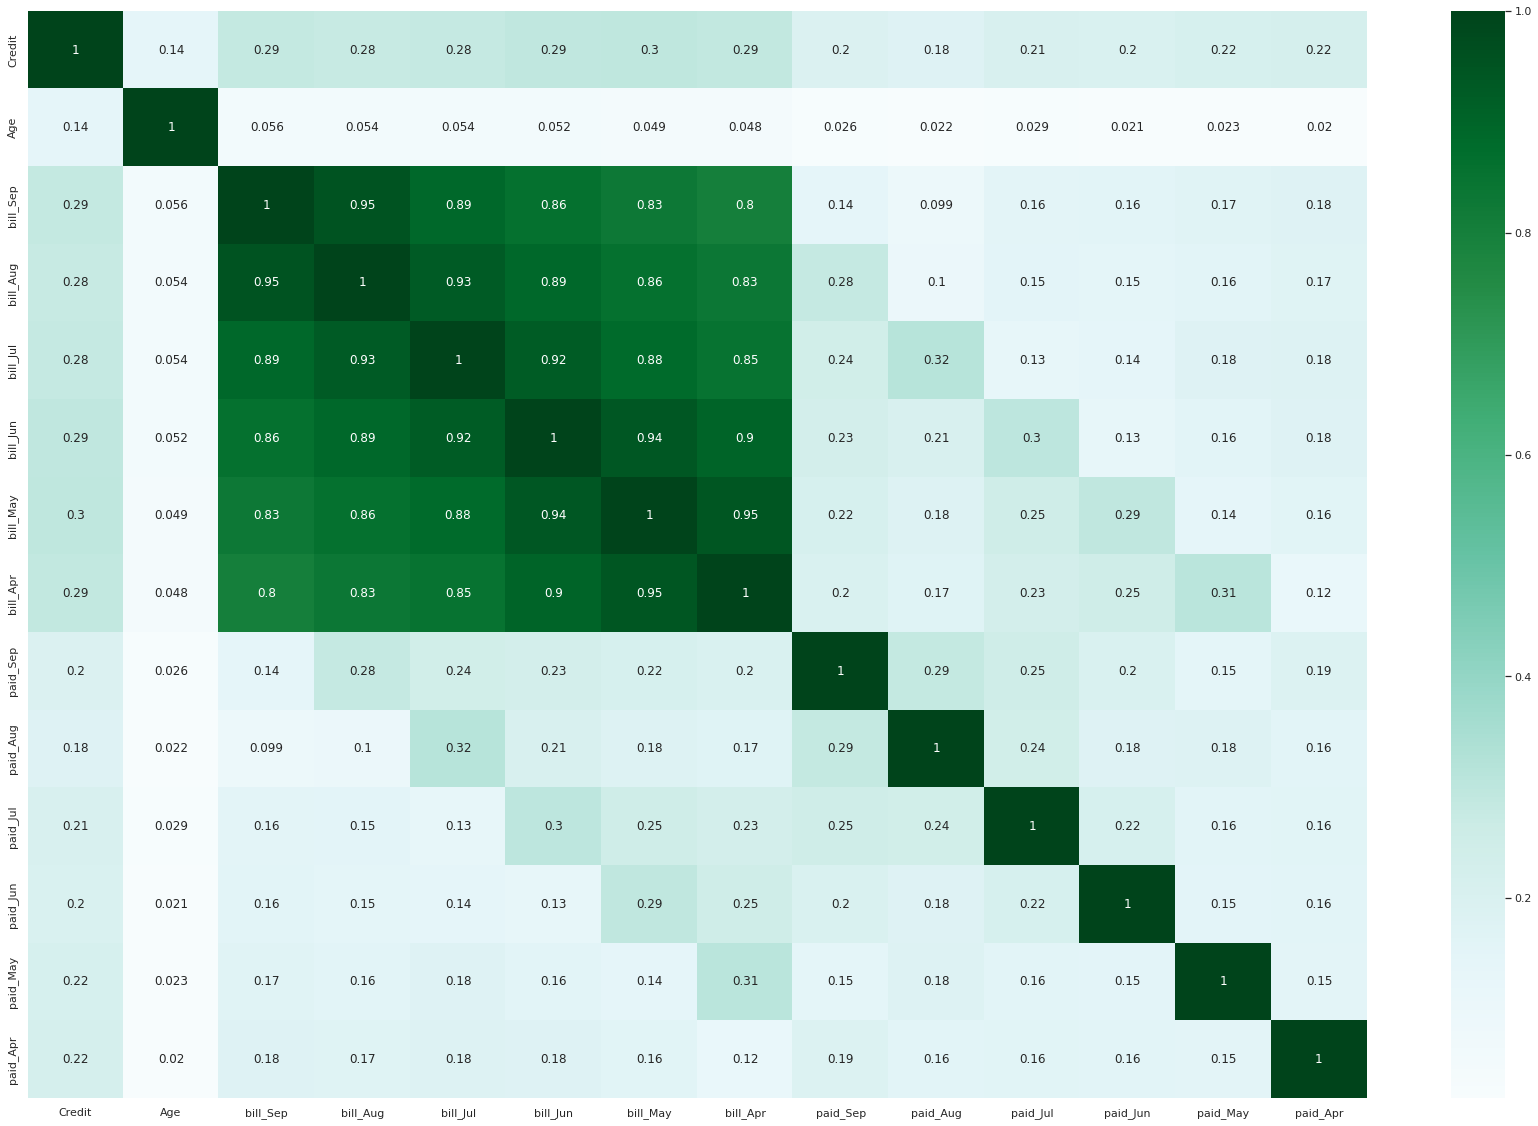

In [ ]:
import seaborn as sns

correlation = df_num.corr()
sns.set(rc = {'figure.figsize': (30,20)})
sns.heatmap(correlation, annot = True, cmap = "BuGn")

The next step is to normalize the data before moving on to PCA since we don't want the PCA to have some kind of bias. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_num)

scaled_df_num= pd.DataFrame (scaled, columns=df_num.columns)
scaled_df_num

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.005241,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.006843,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.006843,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.007003,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.019658,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.010122,0.011723,0.001892
29991,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.005448,0.000000,0.000000
29992,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.011969,0.004689,0.005864
29993,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.008326,0.124174,0.003412


At this point it would be convinient to analyze our dataset's variance before and after normalization to double check that scaling it through Min Max was actually convenient. 

In [ ]:
normal_summary = {
    "Variance" :df_num.var(),
    "Max Value" :df_num.max(),
    "Min Value" :df_num.min(),
    "Mean Value": df_num.mean()
                                  
}
pd.DataFrame(normal_summary).transpose()

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
Variance,1.683550e+10,84.911037,5.422774e+09,5.066211e+09,4.809809e+09,4.139133e+09,3.696562e+09,3.547020e+09,2.743833e+08,5.309967e+08,3.100562e+08,2.455098e+08,2.334885e+08,3.160874e+08
Max Value,1.000000e+06,79.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05
Min Value,1.000000e+04,21.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.272000e+03,0.000000e+00,0.000000e+00
Mean Value,1.674956e+05,35.482580,5.122893e+04,4.918465e+04,4.701845e+04,4.326780e+04,4.031559e+04,3.887752e+04,5.665801e+03,5.924937e+03,5.228206e+03,4.829892e+03,4.802688e+03,5.216260e+03


In [ ]:
scaled_summary = {
    "Variance" :scaled_df_num.var(),
    "Max Value" :scaled_df_num.max(),
    "Min Value" :scaled_df_num.min(),
    "Mean Value": scaled_df_num.mean()
                                  
}
pd.DataFrame(scaled_summary).transpose()

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
Variance,0.017177,0.025241,0.004246,0.004563,0.00145,0.003673,0.003634,0.002095,0.000360,0.000187,0.000386,0.000630,0.001283,0.001131
Max Value,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min Value,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean Value,0.159086,0.249700,0.191851,0.112898,0.11216,0.200895,0.120624,0.290855,0.006486,0.003518,0.005835,0.012978,0.011260,0.009867


By analyzing both tables we can notice that after performing the MinMax Scale, our variance was able 

We are now going to apply PCA

In [43]:
from sklearn.decomposition import PCA

pcs = PCA()
pcs_columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
pcs_t = pcs.fit_transform(scaled_df_num)
pd.DataFrame(pcs_t, columns=pcs_columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.262126,-0.026826,0.028143,-0.001057,0.000751,-0.000307,-0.000109,-0.000632,0.000694,-0.000037,0.000402,0.000399,0.000345,0.000618
1,-0.188326,0.006667,-0.041251,-0.005531,-0.003541,0.002140,-0.002320,-0.003183,-0.000202,-0.000140,-0.000292,0.000744,-0.000279,-0.000090
2,-0.076778,-0.064545,0.016637,-0.001541,0.004301,0.003343,-0.000173,-0.006529,0.003287,-0.000449,0.004961,-0.005172,-0.001219,-0.000418
3,-0.036630,-0.085235,0.081404,-0.005237,0.006529,-0.004503,0.002191,0.000428,-0.002555,0.001195,0.002454,0.005209,0.000922,-0.003399
4,0.231464,-0.306664,0.088169,0.012506,-0.016865,0.012706,0.003337,0.007416,0.003605,0.021082,0.006428,0.005085,-0.001481,0.001027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,0.128237,0.094423,0.071959,-0.058849,0.094887,-0.053504,0.013437,0.038277,0.001835,0.038815,-0.016759,0.021388,0.001403,-0.018017
29991,0.067272,-0.139528,-0.029758,-0.006356,-0.008636,0.002315,-0.005686,0.003563,0.006374,0.000308,-0.001632,0.000985,0.001959,-0.000402
29992,-0.064110,-0.129992,0.059827,0.015989,-0.016928,0.014737,-0.002722,0.003623,0.018352,-0.005279,-0.000415,0.004131,0.000903,-0.001469
29993,0.041315,-0.095424,0.068779,0.107969,0.015866,-0.051582,-0.021529,0.087342,-0.055130,-0.020616,-0.017007,-0.012809,-0.007900,-0.009933


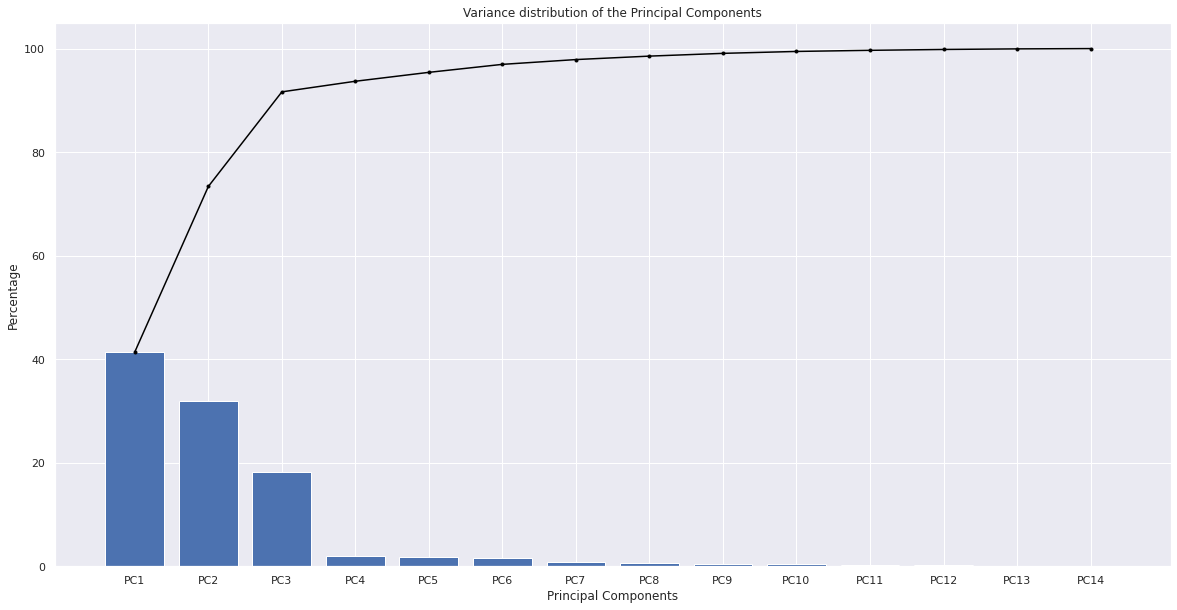

In [67]:
Explained_var=  np.round(pcs.explained_variance_ratio_,4)*100
Acumulated_var= np.cumsum(pcs.explained_variance_ratio_)*100

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(pcs_columns,Explained_var)
plt.plot(pcs_columns,Acumulated_var, color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of the Principal Components")
plt.show()

With this graph we can see that approximately 95% of our data is acumulated in the first 4 components. On the other hand, the last 6 or 7 components are not really significant and could be dropped.

However, let's doulbe check this information with actual numbers.

In [51]:
df_pca_variance= pd.DataFrame()
df_pca_variance['Explained_var']=Explained_var
df_pca_variance['Acumulated_var']=Acumulated_var
df_pca_variance.index=pcs_columns
df_pca_variance

,Explained_var,Acumulated_var
PC1,41.42,41.422397
PC2,31.95,73.370464
PC3,18.27,91.642499
PC4,2.05,93.690758
PC5,1.72,95.411107
PC6,1.54,96.954521
PC7,0.92,97.878636
PC8,0.67,98.545871
PC9,0.53,99.078571
PC10,0.37,99.447354


###**Result:**

Just as the bar graph described us, the minimum principal components that represents 95% of our data variation are the first five principal components.

###Paso 2: Interprete cada componente principal en términos de las variables originales. 

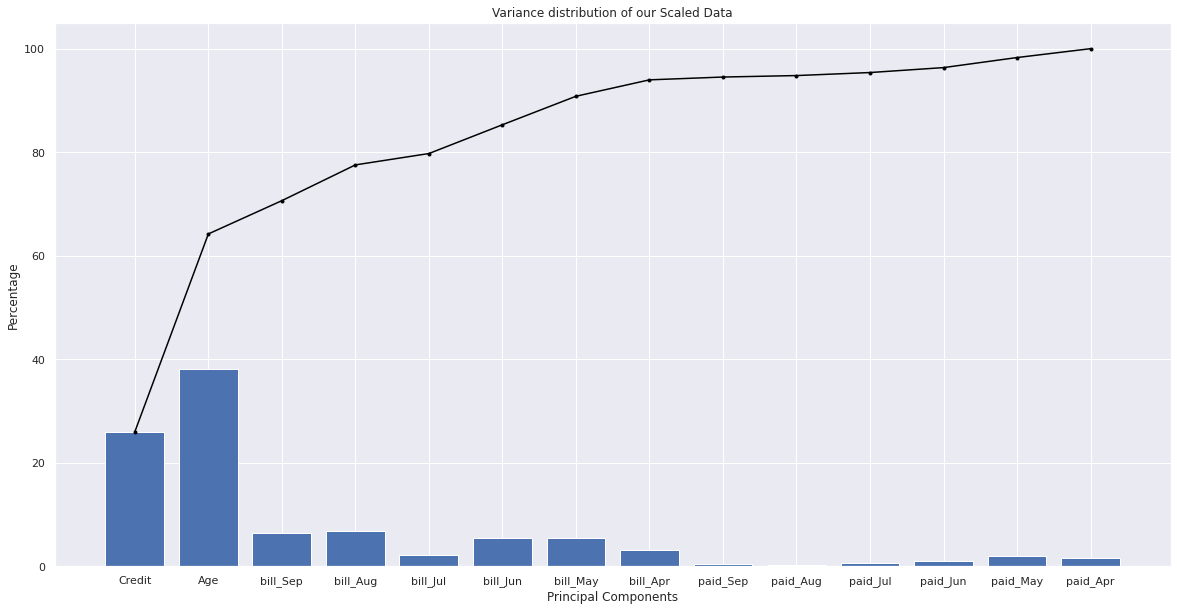

In [68]:
total_var =scaled_df_num.var().sum()

Explained_var_scaled=   (scaled_df_num.var()/ total_var)*100
Acumulated_var_scaled= (scaled_df_num.var().cumsum() / total_var) *100

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(df_num.columns,Explained_var_scaled)
plt.plot(df_num.columns,Acumulated_var_scaled, color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of our Scaled Data")
plt.show()


With this graph we can see that we reach approximately 95% of our data variance around the 7th or 8th variable. This is more compared with using only the first 4 components of the PCA analysis to represent 95% of our variance. 

However, let's doulbe check this information with actual numbers.

In [72]:
df_scaled_variance= pd.DataFrame()
df_scaled_variance['Explained_var']=Explained_var_scaled
df_scaled_variance['Acumulated_var']=Acumulated_var_scaled
df_scaled_variance.index=df_num.columns
df_scaled_variance

,Explained_var,Acumulated_var
Credit,26.003912,26.003912
Age,38.211258,64.215170
bill_Sep,6.428029,70.643199
bill_Aug,6.907580,77.550779
bill_Jul,2.194941,79.745720
bill_Jun,5.560094,85.305814
bill_May,5.502057,90.807870
bill_Apr,3.171129,93.979000
paid_Sep,0.544331,94.523331
paid_Aug,0.283372,94.806703


We were actually wrong, if we used the scaled original value we would require 11 variables to reach 95% of our acumulated variance. That's a huge difference compared to requiring the first 4 principal components. 

###Paso 3: Identifique valores atípicos

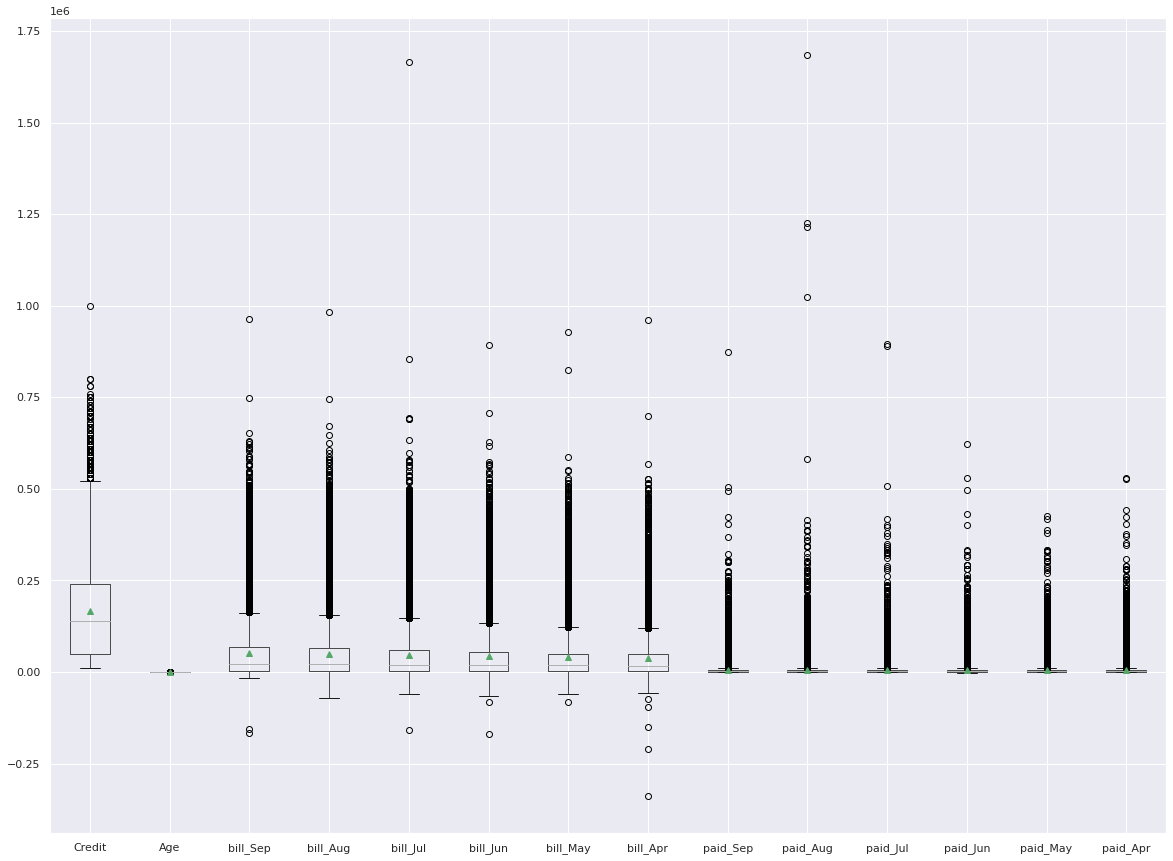

In [61]:
outliers=df_num.boxplot(figsize = (20,15), showmeans=True)
outliers.plot()

plt.show()

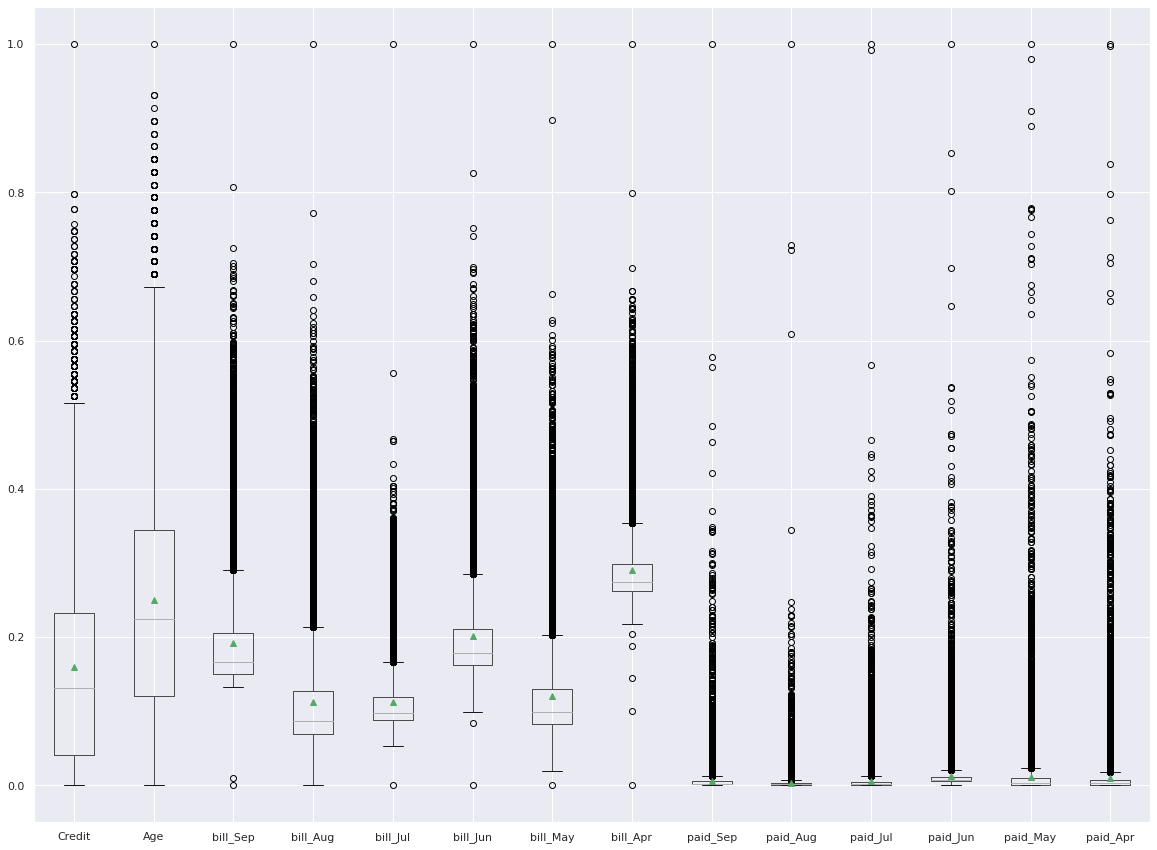

In [62]:
scaled_outliers=scaled_df_num.boxplot(figsize = (20,15), showmeans=True)
scaled_outliers.plot()

plt.show()

In [ ]:
scaled_outliers=scaled_df_num.boxplot(figsize = (20,15), showmeans=True)
scaled_outliers.plot()

plt.show()